<a href="https://colab.research.google.com/github/allanrr/LE732-EnglishForComputing/blob/main/Final_Proj_Eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidade Federal de Pernambuco

Information Systems (CIn - UFPE)

English for Computation

Rafael Bezzera Nonato (rbn@cin.ufpe.br)

**Subject**

```
Deep learning with fastai methodology to identify a computer peripheral.
```


**Group**

```
Allan Rodrigues (allan.deyvson@ufpe.br/adrvs@cin.ufpe.br), 
Franklin Amaral (fansf@cin.ufpe.br/franklin.amaral@ufpe.br), 
Pedro Henrique (pedro.medeiroslima@cin.ufpe.br)
```

# Summary



*   Introduction
*   Our Notebook
  *  Setting up the environment
  *  Saving path to variable, so we can reference it later
*   Creating a DataLoader
  *  Creating a datablock
  *  Using data augmentation
*   Training the model
*   Improving accuracy
*  Exporting to a .pkl file
*   Creating widgets
  *  Creating an "Upload" button
  *  Label that goes under the image, showing the results
  *  Creating a "Classify" button
  *  Function that does all the above commands
*   Conclusion






# Introduction

In this project we thought about a model that will be able to learn about computer accessories - specially keyboards, mice and cabinets. We used the fast.ai methodology (fastai, fastbook, prediction...) to build the project with code in Collab Notebooks, which was presented to us by our Professor Rafael Nonato. We used duckduckgo too. Well, at first, our hypothesis was that deep learning was going to succeed, and the accuracy was going to be more than 90% for all the accessories. For that, we finally created a classifier for each one. In order to our model be properly tested by others, we created an exported it to a .pkl file.

# Our Notebook

**Setting up the environment**

In [ ]:
!pip install fastbook
!pip install -q jmd_imagescraper
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *
import os
os.mkdir('images')

     |████████████████████████████████| 727kB 8.0MB/s 
     |████████████████████████████████| 194kB 16.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 1.2MB 15.7MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 12.8MB 251kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from pathlib import Path
path = Path().cwd()/'components'
from jmd_imagescraper.core import *
duckduckgo_search(path,"cabinets", "gabinete", max_results=100)
duckduckgo_search(path,"mouses", "mouse", max_results=100)
duckduckgo_search(path,"keyboards", "keyboard", max_results=100)
from jmd_imagescraper.imagecleaner import *

Duckduckgo search: gabinete


Duckduckgo search: mouse


Duckduckgo search: keyboard


**Naming our components and saving the file path**

In [ ]:
components = 'mouse','keyboard','cabinet' 

 **Saving path to variable, so we can reference it later**

In [ ]:
fns = get_image_files(path)


# Creating a DataLoader

**Creating datablock**

In [ ]:
components = DataBlock( 
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = components.dataloaders(path)

In [ ]:
components = components.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = components.dataloaders(path)

**Using data augmentation**

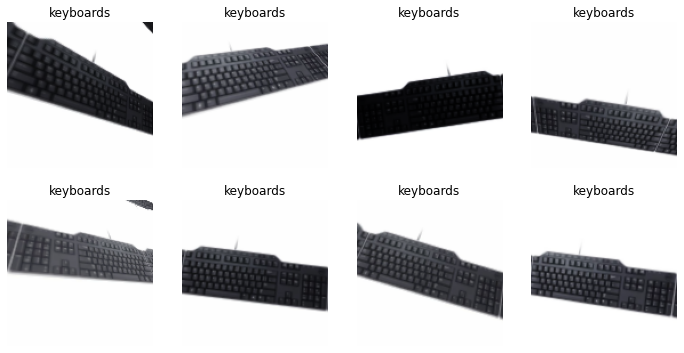

In [ ]:
components = components.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2)) 
dls = components.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# Training the model

In [ ]:
components = components.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = components.dataloaders(path)

**Fine tuning/ errors**

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.404750,0.582809,0.183333,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.341699,0.220569,0.066667,00:02
1,0.276352,0.083760,0.016667,00:02
2,0.201218,0.047064,0.016667,00:02
3,0.159872,0.032948,0.016667,00:02


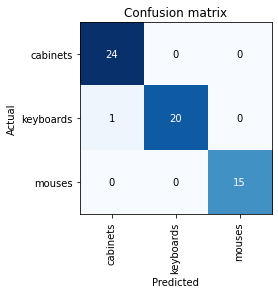

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

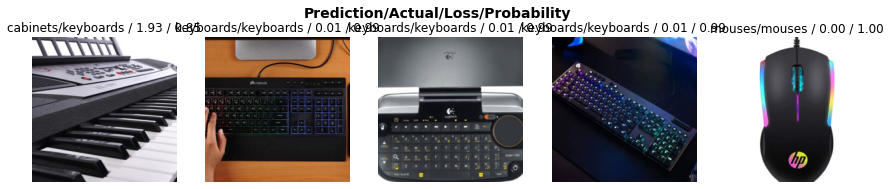

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

# Improving accuracy

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.545100,1.295109,0.300000,00:02
1,0.847719,0.221701,0.066667,00:02
2,0.568873,0.067692,0.033333,00:02


SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=3.311311274956097e-06)

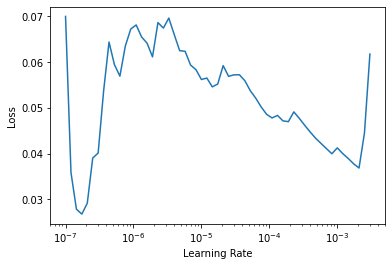

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.020940,0.031863,0.016667,00:02
1,0.027275,0.023064,0.016667,00:02
2,0.036671,0.013090,0.000000,00:02
3,0.031336,0.010267,0.000000,00:02
4,0.026880,0.009267,0.000000,00:02
5,0.030606,0.009359,0.000000,00:02


# Exporting to a .pkl file

In [ ]:
learn.export(path/'export.pkl')

In [ ]:
path.ls(file_exts='.pkl')

(#1) [Path('/content/components/export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

# Creating widgets

**Creating an "Upload" button**


In [ ]:
btn_upload = widgets.FileUpload() 
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

**Label that goes under the image, showing the results**

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cabinets; Probability: 1.0000')

**Creating a "Classify" button**

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

**Function that does all the above commands**

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your accessory!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

# Conlusion

Our hypothesis is correct. When the code reads the images "keyboard, mouse and cabinet" it identifies as a computer accessory with more than 90%.